In [17]:
import networkx as nx
from matplotlib import pyplot as plt
import random
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd

In [10]:
def distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5
def contact_prob(distance, contact_density,x1, y1, x2, y2):
    d = distance(x1, y1, x2, y2)
    return math.exp(-d/contact_density)

In [11]:
#configuration parameters
node_count = 25 #number of nodes
infection_rate = 0.1 #probability of infection
recovery_rate = 0.1 #probability of recovery
timesteps = 100 #number of timesteps
contact_density = 1

In [12]:
square_size = math.sqrt(node_count) #size of square
G = nx.Graph()
for i in range(node_count):
    G.add_node(i)

custom_pos = {}
#initialize node state, color, and position
#set the colors
#S = susceptible (green)
#I = infected (red)
#R = recovered (blue)
for node in G.nodes():
    G.nodes[node]['state'] = 'S'    
    G.nodes[node]['color'] = 'green'
    x,y = random.uniform(0, square_size), random.uniform(0, square_size)
    G.nodes[node]['pos'] = (x,y)
    custom_pos[node] = (x,y)



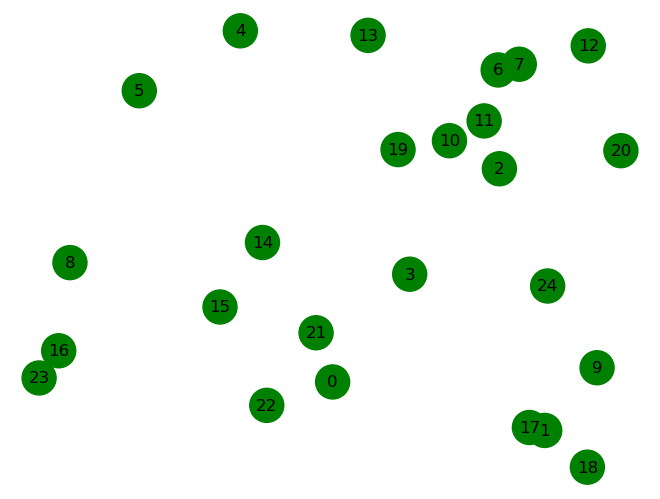

In [13]:
colors = nx.get_node_attributes(G,'color')
nx.draw(G, pos = custom_pos, node_color = list(colors.values()), with_labels = True, node_size = 600)

In [15]:
#set the edges
counter = 0
for x in range(node_count):
    for y in range(x+1, node_count):
        if contact_prob(distance, contact_density, G.nodes[x]['pos'][0], G.nodes[x]['pos'][1], G.nodes[y]['pos'][0], G.nodes[y]['pos'][1]) > random.uniform(0, 1):
            G.add_edge(x,y)
        counter += 1
print(counter)

300


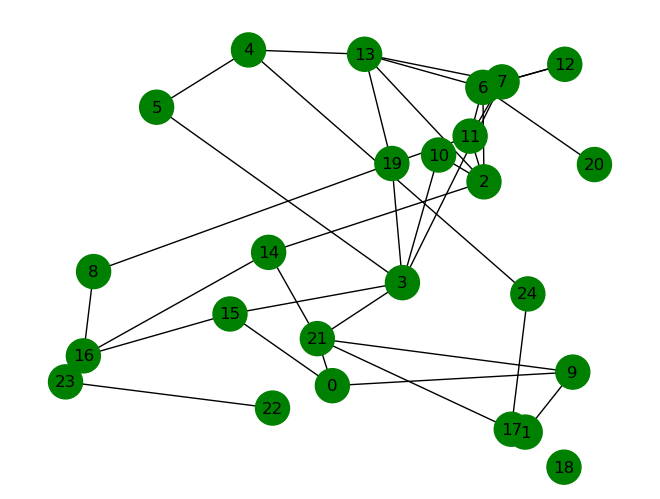

In [16]:
nx.draw(G, pos = custom_pos, node_color = list(colors.values()), with_labels = True, node_size = 600)